## Example 2 Digit recognition

- Collect : image file provided
- prepare : write a function to convert the image format to the list format that can be used in kNN_Classify0
- analyse : check the prepared data if there are some outliers and possible significant features
- train : no need to apply kNN here
- test : error of text_data
- use : extract digits from an image and use.

00000000000001111111111111111111
00000000000111111111111111111111
00000000000111111111111111111111
00000000001111111111111111111110
00000000000111111111111111111110
00000000000111111111100001111100
00000000000000000000000001111100
00000000000000000000000001111100
00000000000000000000000011111000
00000000000000000000000111111000
00000000000000000000001111110000
00000000000000000000001111100000
00000000000000000000001111100000
00000000000000000000111111000000
00000000000000000000111111000000
00000000000000000111111110000000
00000000000001111111111111000000
00000000000011111111111111100000
00000000000111111111111111000000
00000000000111111111111110000000
00000000001111111111110000000000
00000000000111111111100000000000
00000000000000001111100000000000
00000000000000011111000000000000
00000000000000111111000000000000
00000000000001111110000000000000
00000000000001111110000000000000
00000000000001111110000000000000
00000000000011111100000000000000
00000000000111111000000000000000

```
def img2vec(filename):
    with open(filename,'r') as fr:
        raw_image = fr.readlines()                     # text is a string format
        _nb_row = len(raw_image)
        _nb_col = len(raw_image[0])
        _vec = np.empty(_nb_row * _nb_col)
        for i in range(_nb_row):
            _vec[_nb_col*(i-1) : _nb_col*i] = int(raw_image[i])
    return _vec
    
```

上面这样倒入会产生\n转义字符都被导入的情况。原本32个数字变成33个字符。用readlines的时候，每一行是一个str，这么大的一个数被转成了string。  
同时，不像之前的文件有delimeter(空格，逗号)，这里没有间隔字符。所以只能用strip去掉换行然后转换成list，在用list（）切割转换成np array.

```
    with open(filepath,'r') as dossier:
        raw_image = [row.strip() for row in dossier.readlines()]
        img_feature = np.array(list(''.join(raw_image)),dtype = 'i4')     # i4 means int32
    return img_feature

```

##### 枚举法 enumerate
它允许我们遍历数据并自动计数.  enumerate 每次读取list里面一个元素，用value指向。
for counter, value in enumerate(some_list):  
    print(counter, value)
    
    
    ```
    fld = os.listdir(folder)
    for i, digit in enumeratr(fld):
        digitPath = os.path.join(folder,digit)
        feature_array[i,:] = load_image(digitpath)
        label[i] = digit.split('_')[0]
    ```
##### function format
```
input :'{} {}'.format('one', 'two')  
output : 'one', 'two' 
input : ' %d %f %s' % % %
```

    


In [1]:
import os
from lib.utility import load_image, images_data
from lib import kNN

import matplotlib.pyplot as plt
import matplotlib


### Analyse : Visualizing the handwitten digits 

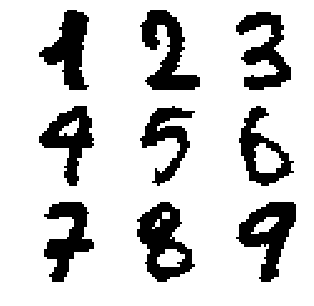

In [2]:
# join the file path together
digit_filepath = [os.path.join('data','digits','trainingDigits','{}_0.txt'.format(i)) for i in range(1,10)]   # take only digit 1-9
f, ax = plt.subplots(3, 3, figsize=(5, 5))
for i, digit in enumerate(digit_filepath):
    digit_image = load_image(digit).reshape(32,32)   # load_image return a vector of 1024 pixel
    # imshow fucntion 
    ax[int(i/3), i%3].imshow(digit_image, cmap=matplotlib.cm.binary,interpolation = 'nearest')
    ax[int(i/3), i%3].axis('off')
    

### Load training dataset and testing dataset
Actually，kNN doesn't train a model.

In [3]:
training_folder = os.path.join('data','digits','trainingDigits')
testing_folder = os.path.join('data','digits','testDigits')
training_folder

'data/digits/trainingDigits'

In [4]:
train_f,train_l = images_data(training_folder)
test_f,test_l = images_data(testing_folder)
print('There are totally {} training samples in the file'.format(train_f.shape[0]))
print('There are totally {} test samples in the file'.format(test_f.shape[0]))
print('There are {} features'.format(train_f.shape[1]))

There are totally 1934 training samples in the file
There are totally 946 test samples in the file
There are 1024 features


### Accuracy for test dataset ：

In [5]:
error_count = 0.0
error_dict = {}
for i, test_digit in enumerate(test_f):
    predict_nb = kNN.kNN_Classify0(test_digit, train_f, train_l, k=3)  
    if predict_nb != test_l[i]:
        error_count+=1
        error_dict[i] = predict_nb
error_rate = error_count/float(len(test_f))
print('The accuracy of kNN method for digit recognition is : {}'.format(1.0-error_rate))


The accuracy of kNN method for digit recognition is : 0.9883720930232558


In [6]:
error_list = list(error_dict.keys())
print( 'the following digits are bad predicted: {}'.format(error_list))
print( 'the {}th digit is {}, but its predicted to be {}'.format(error_list[0], test_l[error_list[0]], error_dict[error_list[0]]))

the following digits are bad predicted: [21, 25, 99, 106, 260, 272, 420, 477, 699, 720, 847]
the 21th digit is 8, but its predicted as 1


### Some error examples : 

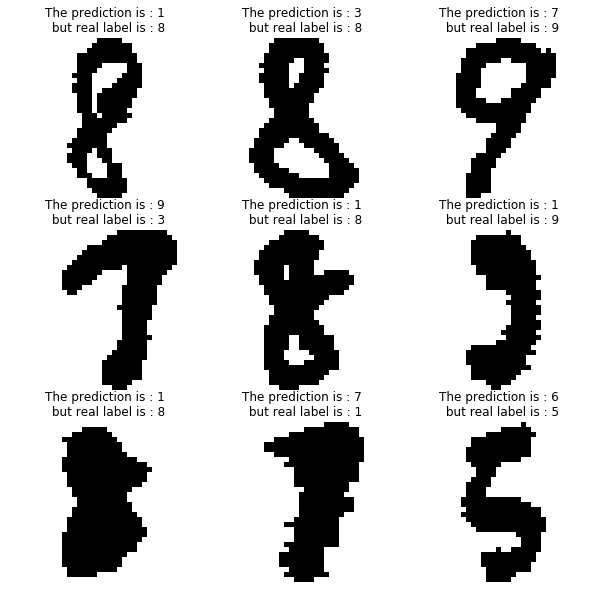

In [30]:
folder = os.path.join('data','digits','testDigits')
list_dir=os.listdir(folder)
fig, ax2 = plt.subplots(3, 3, figsize=(10, 10))
folder
for i in range(9):
    digit_dir= os.path.join(folder,list_dir[error_list[i]])
    digit_image = load_image(digit_dir).reshape(32,32)
    ax2[int(i/3), i%3].imshow(digit_image, cmap=matplotlib.cm.binary,interpolation = 'nearest')
    ax2[int(i/3), i%3].set_title('The prediction is : {} \n but real label is : {}'.format(error_dict[error_list[i]],test_l[error_list[i]]))
    ax2[int(i/3), i%3].axis('off')
    